In [75]:
import numpy as np
import pandas as pd
import matplotlib
import tensorflow as tf
import sklearn

In [76]:
np.__version__, pd.__version__, matplotlib.__version__, tf.__version__, sklearn.__version__

('1.26.4', '2.2.3', '3.10.0', '2.16.1', '1.5.2')

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [78]:

base = pd.read_csv("C:/Users/nanojau/OneDrive/Documentos/CURSOS/DeepLearningWithPythonUdemy/petr4_treinamento.csv")
base = base.dropna()
base

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
1240,2017-12-25,15.750000,15.750000,15.750000,15.750000,15.718563,0.0
1241,2017-12-26,15.750000,15.990000,15.690000,15.970000,15.938125,22173100.0
1242,2017-12-27,15.990000,16.139999,15.980000,16.049999,16.017963,23552200.0
1243,2017-12-28,16.100000,16.129999,16.000000,16.100000,16.067865,19011500.0


In [79]:
base_treinamento = base.iloc[:, 1:7].values

In [80]:
base_treinamento

array([[1.9990000e+01, 2.0209999e+01, 1.9690001e+01, 1.9690001e+01,
        1.8086271e+01, 3.0182600e+07],
       [1.9809999e+01, 2.0400000e+01, 1.9700001e+01, 2.0400000e+01,
        1.8738441e+01, 3.0552600e+07],
       [2.0330000e+01, 2.0620001e+01, 2.0170000e+01, 2.0430000e+01,
        1.8766001e+01, 3.6141000e+07],
       ...,
       [1.5990000e+01, 1.6139999e+01, 1.5980000e+01, 1.6049999e+01,
        1.6017963e+01, 2.3552200e+07],
       [1.6100000e+01, 1.6129999e+01, 1.6000000e+01, 1.6100000e+01,
        1.6067865e+01, 1.9011500e+07],
       [1.6100000e+01, 1.6100000e+01, 1.6100000e+01, 1.6100000e+01,
        1.6067865e+01, 0.0000000e+00]])

In [81]:
normalizador = MinMaxScaler(feature_range=(0,1))
base_treinamento_normalizada = normalizador.fit_transform(base_treinamento)

In [82]:
normalizador_previsao = MinMaxScaler(feature_range=(0,1))
normalizador_previsao.fit_transform(base_treinamento[:, 0:1])

array([[0.76501938],
       [0.7562984 ],
       [0.78149225],
       ...,
       [0.57122093],
       [0.57655039],
       [0.57655039]])

In [83]:
base_treinamento_normalizada

array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
        0.04318274],
       [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
        0.0437121 ],
       [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
        0.05170752],
       ...,
       [0.57122093, 0.57537562, 0.60696008, 0.58202356, 0.58202349,
        0.03369652],
       [0.57655039, 0.57489089, 0.60798362, 0.5844794 , 0.58447937,
        0.02720006],
       [0.57655039, 0.57343674, 0.61310133, 0.5844794 , 0.58447937,
        0.        ]])

In [84]:
X = [] #previsores
y = [] #preço real
for i in range(90, 1242): # preço real será previsot em relação aos 90 preços anteriores
    X.append(base_treinamento_normalizada[i - 90:i, 0:6])
    y.append(base_treinamento_normalizada[i, 0])
print(i, i-90)
X, y  = np.array(X), np.array(y)

1241 1151


In [100]:
X[0] , y[0]

(array([[0.76501938, 0.77266112, 0.79682707, 0.76080559, 0.6838135 ,
         0.04318274],
        [0.7562984 , 0.78187106, 0.79733884, 0.79567784, 0.71590949,
         0.0437121 ],
        [0.78149225, 0.79253519, 0.82139202, 0.79715132, 0.71726583,
         0.05170752],
        [0.78875969, 0.7949588 , 0.81013311, 0.77996075, 0.70144373,
         0.04015963],
        [0.77083338, 0.77363063, 0.78505624, 0.75147351, 0.67522435,
         0.0416214 ],
        [0.74806197, 0.75618037, 0.78505624, 0.76031438, 0.68336137,
         0.03485382],
        [0.75436047, 0.76490543, 0.78915051, 0.76768177, 0.69014234,
         0.02507502],
        [0.75823643, 0.76442079, 0.79733884, 0.77013751, 0.6924025 ,
         0.0260728 ],
        [0.76598837, 0.77411537, 0.79682707, 0.76227897, 0.68516964,
         0.0404927 ],
        [0.76598837, 0.77411537, 0.79682707, 0.76719061, 0.68969016,
         0.0423977 ],
        [0.76017437, 0.75714973, 0.79222108, 0.76817293, 0.69059437,
         0.02401858],

In [101]:
X.shape

(1152, 90, 6)

In [102]:
y.shape

(1152,)

In [103]:
regressor = Sequential()

regressor.add(LSTM(units = 100, return_sequences=True, input_shape = (X.shape[1], 6)))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50, return_sequences=True))
regressor.add(Dropout(0.3))

regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.3))

regressor.add(Dense(units = 1, activation = 'linear'))

regressor.summary()

C:\Users\nanojau\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_12 (LSTM)                  │ (None, 90, 100)        │        42,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 90, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_13 (LSTM)                  │ (None, 90, 50)         │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_14 (LSTM)                  │ (None, 90, 50)         │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 90, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_15 (LSTM)                  │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 113,451 (443.17 KB)

 Trainable params: 113,451 (443.17 KB)

 Non-trainable params: 0 (0.00 B)

In [89]:
regressor.compile(optimizer='adam', loss = 'mean_squared_error',metrics = ['mean_absolute_error'])

In [90]:
#Função utilizada para interromper o treinamento caso o valor do erro não melhore após um número determinado de épocas
es = EarlyStopping(monitor='loss', min_delta=1e-10, patience=10, verbose=True) #0.0000000...1
rlr = ReduceLROnPlateau(monitor='loss', factor=0.2, patience=5, verbose=1)
mcp = ModelCheckpoint(filepath='pesos.keras', monitor='loss', save_best_only=True, verbose = 1)

In [91]:
regressor.fit(X, y, epochs=100, batch_size=32, callbacks=[es, rlr,mcp])

Epoch 1/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - loss: 0.0710 - mean_absolute_error: 0.1952
Epoch 1: loss improved from inf to 0.03148, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 8s 91ms/step - loss: 0.0700 - mean_absolute_error: 0.1933 - learning_rate: 0.0010
Epoch 2/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step - loss: 0.0095 - mean_absolute_error: 0.0764
Epoch 2: loss improved from 0.03148 to 0.00963, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step - loss: 0.0095 - mean_absolute_error: 0.0764 - learning_rate: 0.0010
Epoch 3/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step - loss: 0.0081 - mean_absolute_error: 0.0700
Epoch 3: loss improved from 0.00963 to 0.00835, saving model to pesos.keras
36/36 ━━━━━━━━━━━━━━━━━━━━ 3s 93ms/step - loss: 0.0081 - mean_absolute_error: 0.0700 - learning_rate: 0.0010
Epoch 4/100
36/36 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step - loss: 0.0077 - mean_absolute_error: 0.0672
Epoch 4: loss improved from 0.00835 to 0.00689, saving model 

In [92]:
base_teste = pd.read_csv("C:/Users/nanojau/OneDrive/Documentos/CURSOS/DeepLearningWithPythonUdemy/petr4_teste.csv")
base_teste

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,16.190001,16.549999,16.190001,16.549999,16.516966,33461800
1,2018-01-03,16.490000,16.719999,16.370001,16.700001,16.666668,55940900
2,2018-01-04,16.780001,16.959999,16.620001,16.730000,16.696608,37064900
3,2018-01-05,16.700001,16.860001,16.570000,16.830000,16.796408,26958200
4,2018-01-08,16.740000,17.030001,16.709999,17.030001,16.996010,28400000
5,2018-01-09,17.030001,17.160000,16.959999,17.030001,16.996010,35070900
6,2018-01-10,16.920000,17.049999,16.770000,16.799999,16.766466,28547700
7,2018-01-11,16.879999,17.299999,16.840000,17.250000,17.215569,37921500
8,2018-01-12,17.040001,17.410000,17.020000,17.299999,17.265469,45912100
9,2018-01-15,17.320000,17.440001,17.150000,17.350000,17.315371,28945400


In [104]:
y_teste = base_teste.iloc[:, 1:2].values
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [105]:
frames= [base, base_teste]

In [106]:
base_completa = pd.concat(frames)
base_completa

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-01-02,19.990000,20.209999,19.690001,19.690001,18.086271,30182600.0
1,2013-01-03,19.809999,20.400000,19.700001,20.400000,18.738441,30552600.0
2,2013-01-04,20.330000,20.620001,20.170000,20.430000,18.766001,36141000.0
3,2013-01-07,20.480000,20.670000,19.950001,20.080000,18.444506,28069600.0
4,2013-01-08,20.110001,20.230000,19.459999,19.500000,17.911745,29091300.0
...,...,...,...,...,...,...,...
17,2018-01-25,19.340000,19.340000,19.340000,19.340000,19.301397,0.0
18,2018-01-26,19.620001,19.980000,19.100000,19.930000,19.890221,81989500.0
19,2018-01-29,19.670000,20.049999,19.570000,19.850000,19.810381,55726200.0
20,2018-01-30,19.770000,19.770000,19.360001,19.490000,19.451097,46203000.0


In [107]:
base_completa = base_completa.drop('Date', axis = 1)

In [109]:
len(base_completa), len(base_teste), len(base_completa) - len(base_teste) - 90

(1264, 22, 1152)

In [110]:
entradas = base_completa[len(base_completa) - len(base_teste) -90:].values

In [98]:
entradas

array([[1.3930000e+01, 1.4030000e+01, 1.3760000e+01, 1.3870000e+01,
        1.3842316e+01, 2.7208100e+07],
       [1.3760000e+01, 1.3850000e+01, 1.3680000e+01, 1.3850000e+01,
        1.3822356e+01, 2.7306400e+07],
       [1.3790000e+01, 1.3900000e+01, 1.3440000e+01, 1.3450000e+01,
        1.3423154e+01, 5.8871700e+07],
       [1.3530000e+01, 1.3770000e+01, 1.3470000e+01, 1.3650000e+01,
        1.3622754e+01, 8.2909400e+07],
       [1.3850000e+01, 1.4190000e+01, 1.3820000e+01, 1.4020000e+01,
        1.3992017e+01, 6.0260300e+07],
       [1.3960000e+01, 1.4180000e+01, 1.3940000e+01, 1.4170000e+01,
        1.4141717e+01, 1.8139300e+07],
       [1.4570000e+01, 1.4650000e+01, 1.4230000e+01, 1.4410000e+01,
        1.4381238e+01, 5.6476800e+07],
       [1.4650000e+01, 1.5020000e+01, 1.4510000e+01, 1.5020000e+01,
        1.4990021e+01, 6.8418200e+07],
       [1.5020000e+01, 1.5020000e+01, 1.5020000e+01, 1.5020000e+01,
        1.4990021e+01, 0.0000000e+00],
       [1.5100000e+01, 1.5150000e+01,

In [111]:
entradas = normalizador.transform(entradas)
entradas

array([[0.47141473, 0.47309743, 0.49334698, 0.47495091, 0.47495089,
        0.03892707],
       [0.46317829, 0.46437227, 0.48925281, 0.47396859, 0.47396857,
        0.03906771],
       [0.46463178, 0.46679593, 0.47697032, 0.45432222, 0.45432219,
        0.0842287 ],
       [0.45203488, 0.46049443, 0.47850563, 0.46414541, 0.46414533,
        0.11861983],
       [0.46753876, 0.48085313, 0.4964176 , 0.48231829, 0.48231829,
        0.08621539],
       [0.47286822, 0.4803684 , 0.50255885, 0.48968568, 0.48968565,
        0.02595219],
       [0.50242248, 0.50315075, 0.5174002 , 0.5014735 , 0.50147347,
        0.08080228],
       [0.50629845, 0.5210858 , 0.53172979, 0.53143421, 0.53143421,
        0.09788703],
       [0.52422481, 0.5210858 , 0.55783009, 0.53143421, 0.53143421,
        0.        ],
       [0.52810078, 0.5273873 , 0.54094166, 0.51620828, 0.51620824,
        0.05198851],
       [0.51744186, 0.52253999, 0.54708291, 0.52996073, 0.52996068,
        0.04995475],
       [0.52228682, 0

In [112]:
X_teste = []
for i in range(90, 112):
    X_teste.append(entradas[i-90:i, 0:6])
X_teste = np.array(X_teste)

In [113]:
X_teste.shape

(22, 90, 6)

In [114]:
previsoes = regressor.predict(X_teste)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 519ms/step


In [115]:
previsoes

array([[0.00845068],
       [0.0085773 ],
       [0.00874531],
       [0.00895908],
       [0.00921361],
       [0.00950172],
       [0.00981847],
       [0.01015174],
       [0.0104936 ],
       [0.01084103],
       [0.01118687],
       [0.01153601],
       [0.01190127],
       [0.01228931],
       [0.01269724],
       [0.01311891],
       [0.0135432 ],
       [0.01398324],
       [0.01443036],
       [0.01490263],
       [0.01540716],
       [0.01593599]], dtype=float32)

In [116]:
previsoes = normalizador_previsao.inverse_transform(previsoes)

In [117]:
previsoes

array([[4.374422 ],
       [4.377035 ],
       [4.380503 ],
       [4.3849154],
       [4.3901687],
       [4.3961153],
       [4.402653 ],
       [4.409532 ],
       [4.416588 ],
       [4.423759 ],
       [4.430897 ],
       [4.438103 ],
       [4.445642 ],
       [4.4536514],
       [4.462071 ],
       [4.4707747],
       [4.479532 ],
       [4.488614 ],
       [4.497843 ],
       [4.5075903],
       [4.5180035],
       [4.5289187]], dtype=float32)

In [118]:
y_teste

array([[16.190001],
       [16.49    ],
       [16.780001],
       [16.700001],
       [16.74    ],
       [17.030001],
       [16.92    ],
       [16.879999],
       [17.040001],
       [17.32    ],
       [17.35    ],
       [17.92    ],
       [18.35    ],
       [18.309999],
       [18.26    ],
       [18.4     ],
       [18.42    ],
       [19.34    ],
       [19.620001],
       [19.67    ],
       [19.77    ],
       [19.74    ]])

In [119]:
previsoes.mean()

4.4398785

In [120]:
y_teste.mean()

17.87454563636364

In [121]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_teste, previsoes)

13.434666890851107

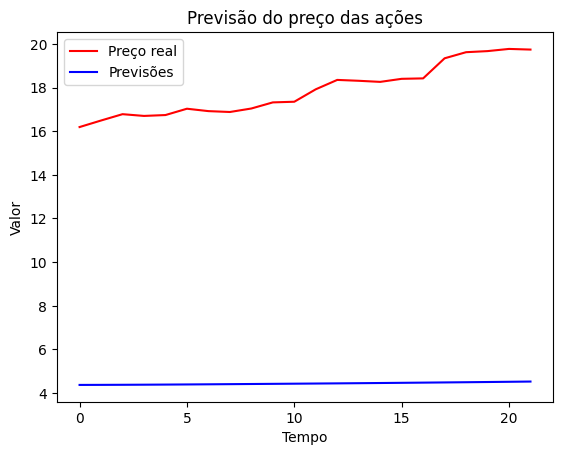

In [123]:
plt.plot(y_teste, color = "red", label = "Preço real")
plt.plot(previsoes, color = "blue", label = "Previsões")
plt.title("Previsão do preço das ações")
plt.xlabel("Tempo")
plt.ylabel("Valor")
plt.legend();